In [1]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

#Find a path
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [2]:
import pandas as pd

In [3]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [4]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
#Dropping missing data
mars_df.dropna()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
mars_df.duplicated().sum()

0

In [5]:
#Find the table 
table = html_soup.find('table', class_='data-row')

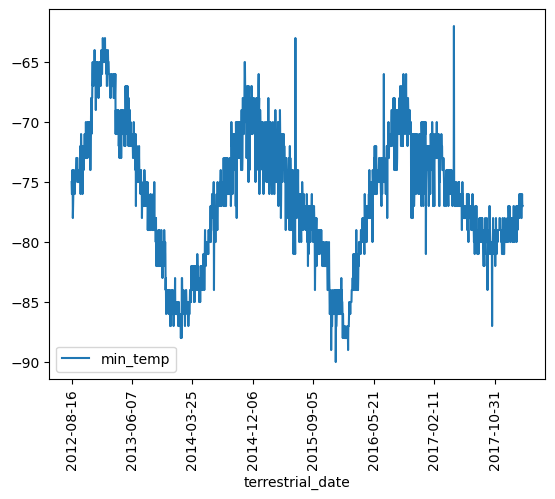

In [6]:
import matplotlib.pyplot as plt
# How many months exist on Mars?
#plt.plot(mars_df['terrestrial_date'],mars_df['min_temp'])
mars_df.plot(x="terrestrial_date", y="min_temp")
plt.xticks(rotation = 90)
plt.show()

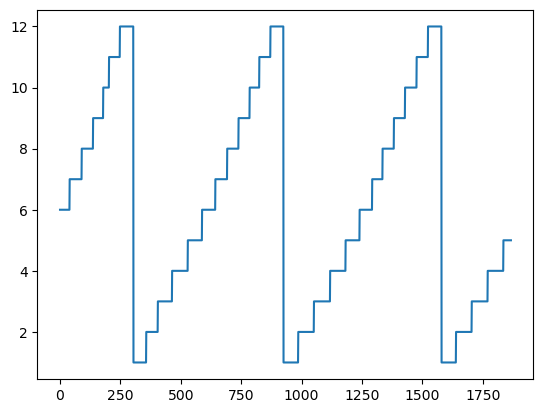

In [7]:
# How many Martian(and not Earth) days worth of data exist in the scraped dataset?
#Hint: Find the peaks .. Playing around with finding Peaks
from scipy.signal import find_peaks
import numpy as np
mars_df["month"].plot()
plt.plot(figsize=(30,30))
#plt.xticks(tick_locations, mars_df["terrestrial_date"])
plt.show()
#peaks = find_peaks('terrestrial_date')

In [10]:
#Check the data types
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [11]:
mars_df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


In [12]:
mars_df.mean()

C:\Users\memus\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id           955.551152
sol         1015.670059
ls           168.865024
month          6.141939
min_temp     -76.121050
pressure     841.066417
dtype: float64

In [13]:
mars_df.max()

id                        1895
terrestrial_date    2018-02-27
sol                       1977
ls                         359
month                       12
min_temp                 -62.0
pressure                 925.0
dtype: object

In [14]:
min_temp_df = mars_df['min_temp'].min()
min_temp_df

-90.0

In [27]:
avg_temp_df = mars_df['min_temp']
avg_temp_df

0      -75.0
1      -76.0
2      -76.0
3      -74.0
4      -74.0
        ... 
1862   -78.0
1863   -77.0
1864   -76.0
1865   -77.0
1866   -77.0
Name: min_temp, Length: 1867, dtype: float64

In [26]:
avg_month = mars_df['month']
avg_month

0       6
1       6
2       6
3       6
4       6
       ..
1862    5
1863    5
1864    5
1865    5
1866    5
Name: month, Length: 1867, dtype: int64

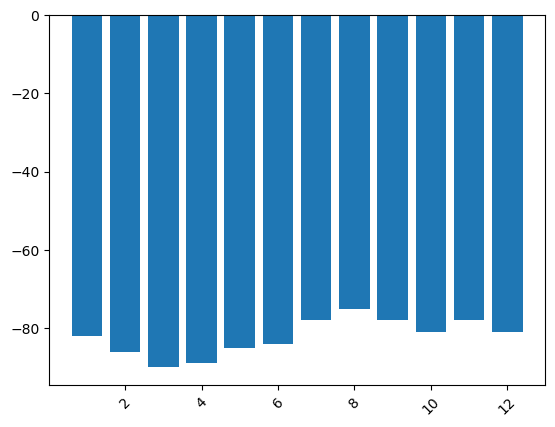

In [29]:
# What are the coldest and warmest months on Mars? 
plt.bar(avg_month, avg_temp_df)
#mars_df.plot.bar(x="min_temp", y="month")
plt.xticks(rotation =45)
plt.show()
# Avg min daily temp of the months.

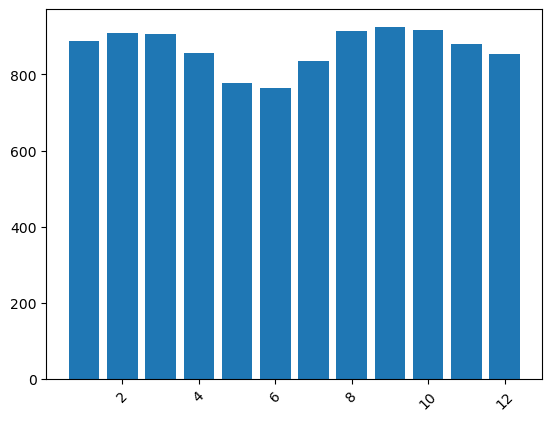

In [30]:
#Which months have the lowest and highest atmospheric pressure on Mars?
avg_pre = mars_df['pressure']
plt.bar(avg_month, avg_pre)
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:>

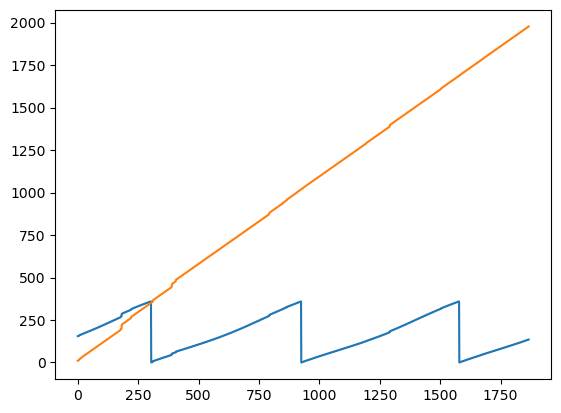

In [19]:
# how many terrestrial(Earth) days exist in the Martian yr? 
mars_df["ls"].plot()
# How many days elapse on Earth, Mars circles the sun once.
mars_df["sol"].plot()
# Plot the daily min temp.

In [33]:
# Export the DataFrame to a CSV file.
mars_df.to_csv('mars_data.csv', index=False)

In [34]:
browser.quit()